In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HDFC.BO.csv')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
print(df.to_string())

            Date         Open         High          Low        Close    Adj Close      Volume
0     2009-06-29   487.000000   490.000000   470.799988   474.390015   396.732483    644125.0
1     2009-06-30   479.799988   481.000000   463.000000   469.079987   392.291718    373510.0
2     2009-07-01   473.000000   477.049988   464.799988   469.190002   392.383759    382080.0
3     2009-07-02   471.010010   483.600006   470.440002   480.109985   401.516113   1127830.0
4     2009-07-03   476.000000   519.799988   476.000000   517.250000   432.576263   1342650.0
5     2009-07-06   520.000000   523.799988   461.399994   470.709991   398.274872   1135050.0
6     2009-07-07   472.000000   480.000000   460.220001   472.839996   400.077057    627440.0
7     2009-07-08   467.200012   469.000000   449.000000   464.049988   392.639709    603895.0
8     2009-07-09   461.000000   472.399994   458.000000   461.350006   390.355133    439325.0
9     2009-07-10   463.179993   463.179993   430.000000   43

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-29,487.000000,490.000000,470.799988,474.390015,396.732483,644125.0
1,2009-06-30,479.799988,481.000000,463.000000,469.079987,392.291718,373510.0
2,2009-07-01,473.000000,477.049988,464.799988,469.190002,392.383759,382080.0
3,2009-07-02,471.010010,483.600006,470.440002,480.109985,401.516113,1127830.0
4,2009-07-03,476.000000,519.799988,476.000000,517.250000,432.576263,1342650.0
...,...,...,...,...,...,...,...
2961,2021-06-21,2468.850098,2524.199951,2455.800049,2516.300049,2516.300049,110622.0
2962,2021-06-22,2543.149902,2545.600098,2514.000000,2521.750000,2521.750000,76735.0
2963,2021-06-23,2543.949951,2543.949951,2493.000000,2497.899902,2497.899902,161049.0
2964,2021-06-24,2511.199951,2513.000000,2485.000000,2487.300049,2487.300049,128061.0


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-29,487.000000,490.000000,470.799988,474.390015,396.732483,644125.0
1,2009-06-30,479.799988,481.000000,463.000000,469.079987,392.291718,373510.0
2,2009-07-01,473.000000,477.049988,464.799988,469.190002,392.383759,382080.0
3,2009-07-02,471.010010,483.600006,470.440002,480.109985,401.516113,1127830.0
4,2009-07-03,476.000000,519.799988,476.000000,517.250000,432.576263,1342650.0


In [6]:
df['Date']

0       2009-06-29
1       2009-06-30
2       2009-07-01
3       2009-07-02
4       2009-07-03
           ...    
2961    2021-06-21
2962    2021-06-22
2963    2021-06-23
2964    2021-06-24
2965    2021-06-25
Name: Date, Length: 2966, dtype: object

In [7]:
df['Date']=pd.to_datetime(df.Date)

In [8]:
df.shape

(2966, 7)

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-29,487.000000,490.000000,470.799988,474.390015,396.732483,644125.0
1,2009-06-30,479.799988,481.000000,463.000000,469.079987,392.291718,373510.0
2,2009-07-01,473.000000,477.049988,464.799988,469.190002,392.383759,382080.0
3,2009-07-02,471.010010,483.600006,470.440002,480.109985,401.516113,1127830.0
4,2009-07-03,476.000000,519.799988,476.000000,517.250000,432.576263,1342650.0
...,...,...,...,...,...,...,...
2961,2021-06-21,2468.850098,2524.199951,2455.800049,2516.300049,2516.300049,110622.0
2962,2021-06-22,2543.149902,2545.600098,2514.000000,2521.750000,2521.750000,76735.0
2963,2021-06-23,2543.949951,2543.949951,2493.000000,2497.899902,2497.899902,161049.0
2964,2021-06-24,2511.199951,2513.000000,2485.000000,2487.300049,2487.300049,128061.0


In [10]:
df.drop('Adj Close',axis=1,inplace=True)

In [11]:
df

,Date,Open,High,Low,Close,Volume
0,2009-06-29,487.000000,490.000000,470.799988,474.390015,644125.0
1,2009-06-30,479.799988,481.000000,463.000000,469.079987,373510.0
2,2009-07-01,473.000000,477.049988,464.799988,469.190002,382080.0
3,2009-07-02,471.010010,483.600006,470.440002,480.109985,1127830.0
4,2009-07-03,476.000000,519.799988,476.000000,517.250000,1342650.0
...,...,...,...,...,...,...
2961,2021-06-21,2468.850098,2524.199951,2455.800049,2516.300049,110622.0
2962,2021-06-22,2543.149902,2545.600098,2514.000000,2521.750000,76735.0
2963,2021-06-23,2543.949951,2543.949951,2493.000000,2497.899902,161049.0
2964,2021-06-24,2511.199951,2513.000000,2485.000000,2487.300049,128061.0


In [12]:
df.isnull().sum()

Date       0
Open      14
High      14
Low       14
Close     14
Volume    14
dtype: int64

In [13]:
new_df=df.dropna()

In [14]:
new_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
new_df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 2965
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2952 non-null   datetime64[ns]
 1   Open    2952 non-null   float64       
 2   High    2952 non-null   float64       
 3   Low     2952 non-null   float64       
 4   Close   2952 non-null   float64       
 5   Volume  2952 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 161.4 KB


In [17]:
new_df.describe()

,Open,High,Low,Close,Volume
count,2952.000000,2952.000000,2952.000000,2952.000000,2.952000e+03
mean,1275.800647,1290.008103,1259.485732,1274.564000,2.336598e+05
std,603.266725,609.514024,595.782293,602.640070,7.814224e+05
min,435.829987,447.600006,429.000000,439.829987,0.000000e+00
25%,714.000000,723.187500,703.974991,713.887512,6.321275e+04
50%,1181.500000,1200.000000,1166.299988,1179.750000,1.132080e+05
75%,1787.312531,1810.712463,1763.575012,1785.200012,2.442742e+05
max,2879.000000,2895.350098,2839.750000,2860.399902,2.512303e+07


In [18]:
new_df

,Date,Open,High,Low,Close,Volume
0,2009-06-29,487.000000,490.000000,470.799988,474.390015,644125.0
1,2009-06-30,479.799988,481.000000,463.000000,469.079987,373510.0
2,2009-07-01,473.000000,477.049988,464.799988,469.190002,382080.0
3,2009-07-02,471.010010,483.600006,470.440002,480.109985,1127830.0
4,2009-07-03,476.000000,519.799988,476.000000,517.250000,1342650.0
...,...,...,...,...,...,...
2961,2021-06-21,2468.850098,2524.199951,2455.800049,2516.300049,110622.0
2962,2021-06-22,2543.149902,2545.600098,2514.000000,2521.750000,76735.0
2963,2021-06-23,2543.949951,2543.949951,2493.000000,2497.899902,161049.0
2964,2021-06-24,2511.199951,2513.000000,2485.000000,2487.300049,128061.0


In [19]:
print(len(new_df))

2952


<AxesSubplot:>

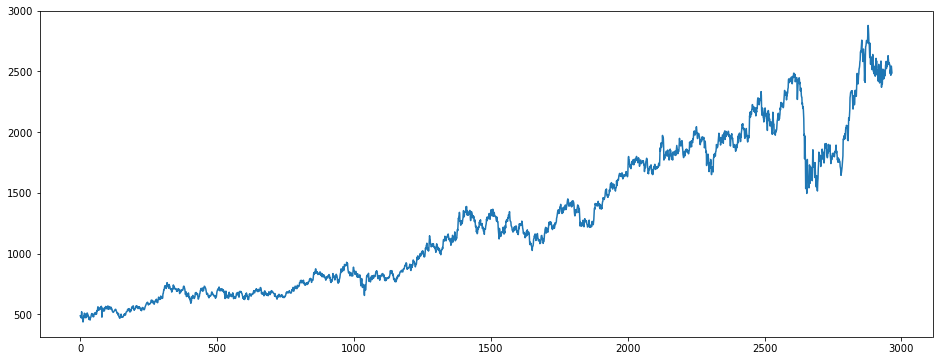

In [20]:
new_df['Open'].plot(figsize=(16,6))

<AxesSubplot:>

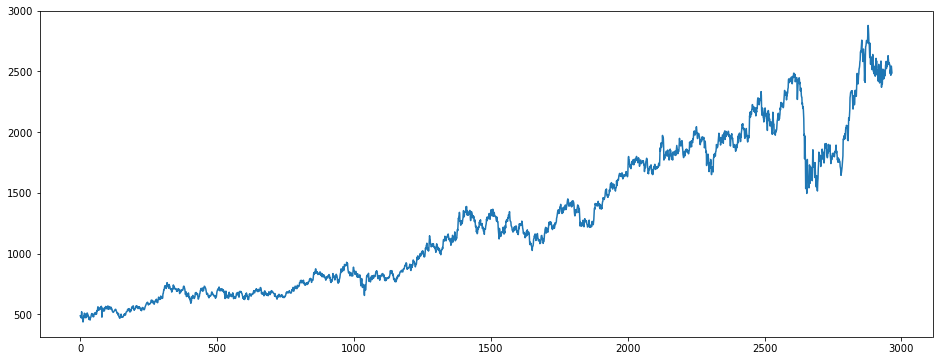

In [21]:
new_df['Open'].plot(x=['Date'],y=['Open'],figsize=(16,6))

In [22]:
x=new_df[['Open','High','Low','Volume']]
y=new_df['Close']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [24]:
x_train.shape

(2214, 4)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [26]:
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
print(regressor.coef_)

[-5.88696496e-01  7.53963890e-01  8.35970980e-01  2.77420747e-07]


In [28]:
print(regressor.intercept_)

0.0489151864555879


In [29]:
predicted=regressor.predict(x_test)

In [30]:
print(x_test)

             Open         High          Low     Volume
1312  1040.000000  1040.000000  1003.000000    80732.0
2801  2051.000000  2063.850098  2027.000000    80210.0
2298  1728.900024  1765.800049  1717.800049    61316.0
2681  1735.000000  1740.550049  1685.650024   164833.0
1946  1572.800049  1580.000000  1555.150024   336193.0
...           ...          ...          ...        ...
2767  1789.000000  1792.949951  1773.300049    64019.0
1862  1225.000000  1225.000000  1205.300049    87123.0
587    678.099976   689.950012   675.000000    30481.0
465    669.950012   669.950012   656.049988  1405415.0
1084   842.000000   858.700012   838.250000   128215.0

[738 rows x 4 columns]


In [31]:
predicted.shape

(738,)

In [32]:
dframe=pd.DataFrame(y_test,predicted)

In [33]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted Price':predicted})

In [34]:
print(dfr)

           Actual  Predicted Price
1312  1006.500000      1010.428294
2801  2039.150024      2043.236277
2298  1738.699951      1749.649003
2681  1689.699951      1700.172610
1946  1561.699951      1565.563539
...           ...              ...
2767  1777.550049      1781.135542
1862  1216.550049      1210.121505
587    679.799988       685.340097
465    665.549988       659.598450
1084   841.150024       852.583510

[738 rows x 2 columns]


In [35]:
dfr.head(25)

,Actual,Predicted Price
1312,1006.500000,1010.428294
2801,2039.150024,2043.236277
2298,1738.699951,1749.649003
2681,1689.699951,1700.172610
1946,1561.699951,1565.563539
259,615.520020,621.253249
339,735.750000,735.872703
118,520.320007,518.037407
1375,1121.300049,1124.724386
2295,1715.150024,1703.688263


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
from sklearn.metrics import r2_score

In [38]:
score=r2_score(y_test,predicted)

In [39]:
print(score)

0.9997462191182789


In [40]:
import math

In [41]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error 5.8471070311247395


In [42]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error 92.55166605447576


In [43]:
print('Root Mean Squared Error',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Root Mean Squared Error 2.418079202822922


In [44]:
graph=dfr.head(20)

In [45]:
df.shape

(2966, 6)

<AxesSubplot:>

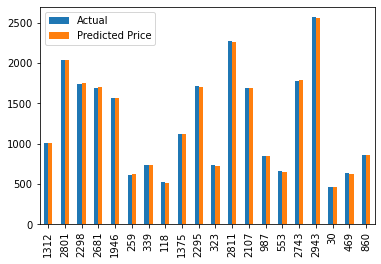

In [46]:
graph.plot(kind='bar')

In [52]:
close = [[2420, 2464, 2414, 4128459]]
own_pred = regressor.predict(close)
print("open , High, Low , Volume={}".format(close))
print("predicted Closing Price ={}".format(own_pred[0]))

open , High, Low , Volume=[[2420, 2464, 2414, 4128459]]
predicted Closing Price =2452.349684240605
